In [1]:
import tensorflow as tf
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ipywidgets import widgets
from io import BytesIO


In [2]:
BASE_DIR = '/kaggle/input/rock-paper-scissor/rps/rps'

rock_dir = os.path.join(BASE_DIR, 'rock')
paper_dir = os.path.join(BASE_DIR, 'paper')
scissors_dir = os.path.join(BASE_DIR, 'scissors')

print(f'total training rock images: {len(os.listdir(rock_dir))}')
print(f'total training paper images: {len(os.listdir(paper_dir))}')
print(f'total training scissors images: {len(os.listdir(scissors_dir))}')

rock_files = os.listdir(rock_dir)
paper_files = os.listdir(paper_dir)
scissors_files = os.listdir(scissors_dir)

print()
print(f"5 files in the rock subdir: {rock_files[:5]}")
print(f"5 files in the paper subdir: {paper_files[:5]}")
print(f"5 files in the scissors subdir: {scissors_files[:5]}")

total training rock images: 840
total training paper images: 840
total training scissors images: 840

5 files in the rock subdir: ['rock03-099.png', 'rock03-049.png', 'rock01-048.png', 'rock07-k03-090.png', 'rock02-030.png']
5 files in the paper subdir: ['paper06-050.png', 'paper02-044.png', 'paper04-056.png', 'paper02-048.png', 'paper06-081.png']
5 files in the scissors subdir: ['scissors02-118.png', 'testscissors02-000.png', 'scissors04-006.png', 'testscissors01-081.png', 'scissors04-048.png']


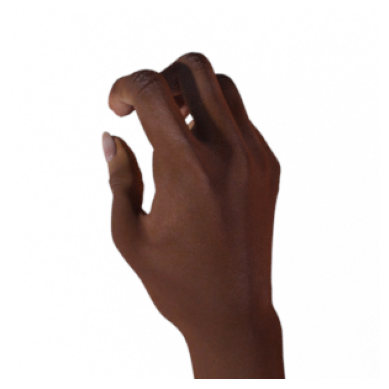

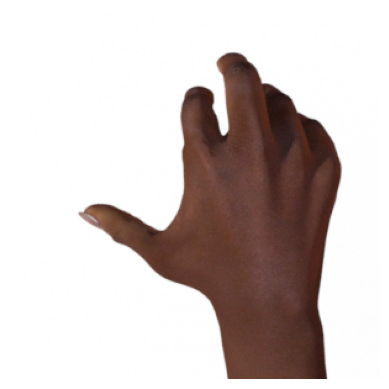

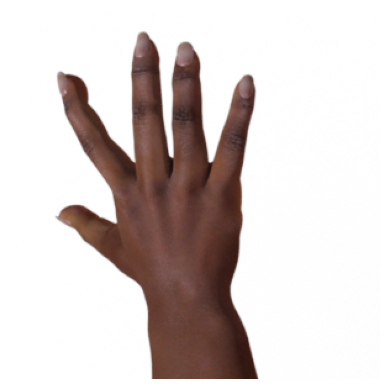

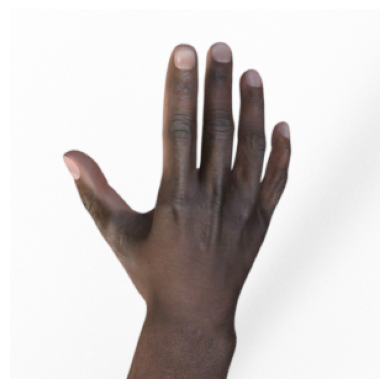

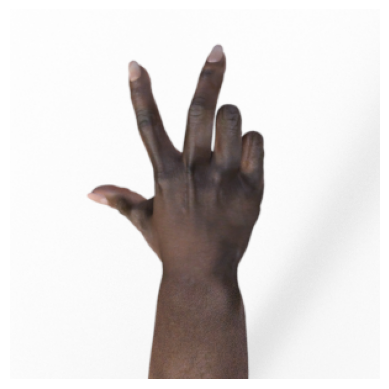

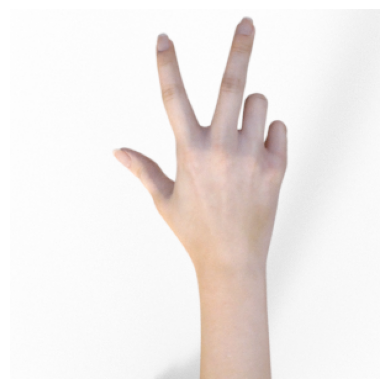

In [3]:
next_rock = [os.path.join(rock_dir, fname)
             for fname in random.sample(rock_files, k=2)]
next_paper = [os.path.join(paper_dir, fname)
              for fname in random.sample(paper_files, k=2)]
next_scissors = [os.path.join(scissors_dir, fname)
                 for fname in random.sample(scissors_files, k=2)]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()

In [4]:
TRAINING_DIR = '/kaggle/input/rock-paper-scissor/rps/rps'
VALIDATION_DIR = '/kaggle/input/rock-paper-scissor/rps-test-set/rps-test-set'

train_dataset = tf.keras.utils.image_dataset_from_directory(
    TRAINING_DIR,
    image_size=(150,150),
    batch_size=32,
    label_mode='categorical'
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    VALIDATION_DIR,
    image_size=(150,150),
    batch_size=32,
    label_mode='categorical'
)

Found 2520 files belonging to 3 classes.
Found 372 files belonging to 3 classes.


In [5]:
SHUFFLE_BUFFER_SIZE = 1000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE

train_dataset_final = (
    train_dataset
    .cache()
    .shuffle(SHUFFLE_BUFFER_SIZE)
    .prefetch(PREFETCH_BUFFER_SIZE)
)

validation_dataset_final = (
    validation_dataset
    .cache()
    .shuffle(SHUFFLE_BUFFER_SIZE)
    .prefetch(PREFETCH_BUFFER_SIZE)
)

In [6]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.Input(shape=(150,150, 3)),
        tf.keras.layers.Rescaling(1./255),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    return model

In [7]:
def create_augmentation():
    data_augmentation = tf.keras.models.Sequential([
        tf.keras.Input(shape=(150,150,3)),
        tf.keras.layers.RandomFlip('horizontal'),
        tf.keras.layers.RandomRotation(0.4),
        tf.keras.layers.RandomTranslation(0.2, 0.2),
        tf.keras.layers.RandomContrast(0.4),
        tf.keras.layers.RandomZoom(0.2)
    ])
    return data_augmentation

In [8]:
model = create_model()
augmentation = create_augmentation()

model_complete = tf.keras.models.Sequential([
    augmentation,
    model
])

In [9]:
model_complete.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [10]:
history = model_complete.fit(
    train_dataset_final,
    epochs=25,
    validation_data = validation_dataset_final,
    verbose=1
)

Epoch 1/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 55ms/step - accuracy: 0.3250 - loss: 1.2362 - val_accuracy: 0.3333 - val_loss: 1.0946
Epoch 2/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.3612 - loss: 1.0986 - val_accuracy: 0.5134 - val_loss: 1.0322
Epoch 3/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.4200 - loss: 1.0741 - val_accuracy: 0.4677 - val_loss: 0.8336
Epoch 4/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.5233 - loss: 0.9579 - val_accuracy: 0.6478 - val_loss: 0.6173
Epoch 5/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6072 - loss: 0.8405 - val_accuracy: 0.8495 - val_loss: 0.3959
Epoch 6/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6692 - loss: 0.7151 - val_accuracy: 0.8280 - val_loss: 0.3708
Epoch 7/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7541 - loss: 0.5886 - val_accuracy: 0.7177 - val_loss: 0.4759
Epoch 8/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7700 - loss: 0.5466 - val_accuracy: 0.7177 - 

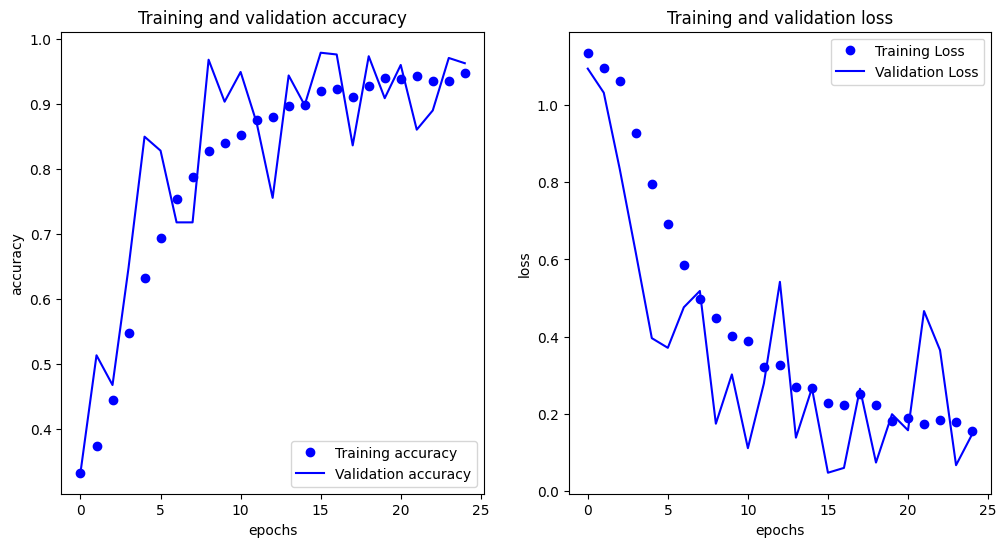

In [11]:
def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  fig, ax = plt.subplots(1,2, figsize=(12, 6))
  ax[0].plot(epochs, acc, 'bo', label='Training accuracy')
  ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
  ax[0].set_title('Training and validation accuracy')
  ax[0].set_xlabel('epochs')
  ax[0].set_ylabel('accuracy')
  ax[0].legend()

  ax[1].plot(epochs, loss, 'bo', label='Training Loss')
  ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
  ax[1].set_title('Training and validation loss')
  ax[1].set_xlabel('epochs')
  ax[1].set_ylabel('loss')
  ax[1].legend()

  plt.show()

plot_loss_acc(history)